In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary_Data.csv


# Loading Dataset

In [2]:
import pandas as pd

pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/kaggle/input/salary/Salary_Data.csv")

# EDA

In [4]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [8]:
from matplotlib import pyplot as plt

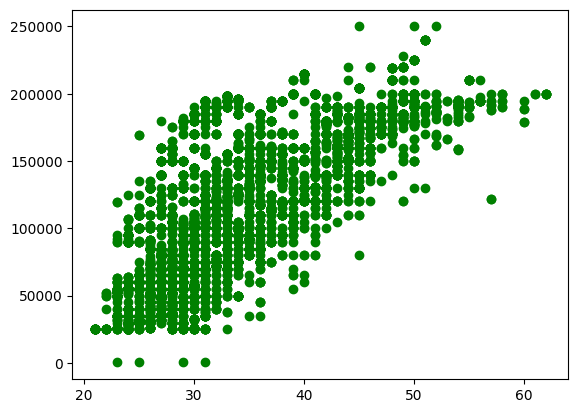

In [9]:
plt.scatter(df["Age"], df["Salary"], color="green")

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_35/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [11]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

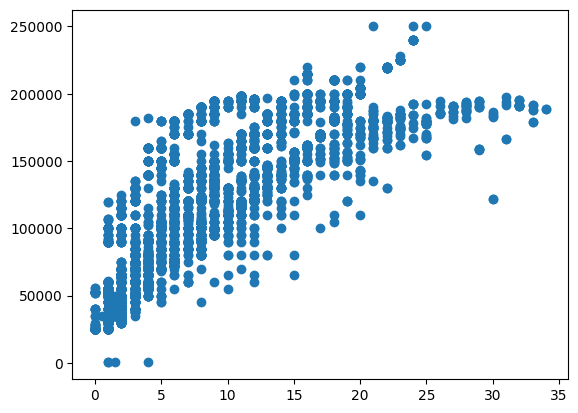

In [12]:
plt.scatter(df['Years of Experience'], df['Salary'])

In [13]:
df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)

/tmp/ipykernel_35/3240589410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)


In [14]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 5
dtype: int64

In [15]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='count'>

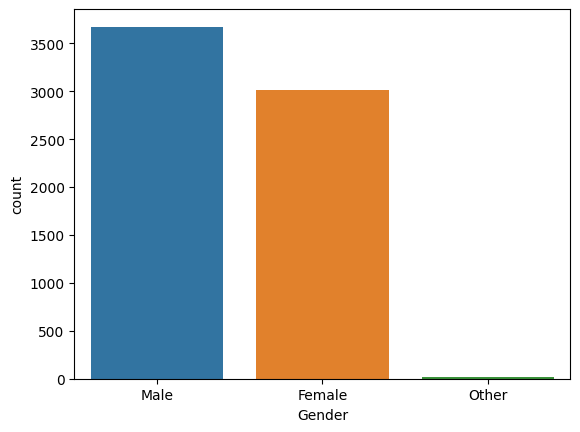

In [16]:
sns.countplot(x="Gender", data = df)

In [17]:
df["Gender"].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [18]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)

/tmp/ipykernel_35/612411333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)


In [19]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        3
Job Title              2
Years of Experience    0
Salary                 5
dtype: int64

In [20]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [21]:
df["Education Level"].fillna(df["Education Level"].mode()[0], inplace = True)

/tmp/ipykernel_35/3463898640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education Level"].fillna(df["Education Level"].mode()[0], inplace = True)


In [22]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              2
Years of Experience    0
Salary                 5
dtype: int64

In [23]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [24]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [25]:
ed_dict = {
    "Bachelor's": "Bachelor's",
    "Bachelor's Degree": "Bachelor's",
    "PhD": "PhD",
    "phD": "PhD",
    "Master's" : "Master's",
    "Master's Degree" : "Master's",
    "High School" : "High School"
}

In [26]:
df["Education Level"] = df["Education Level"].replace(ed_dict) 

In [27]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

<Axes: xlabel='Education Level', ylabel='count'>

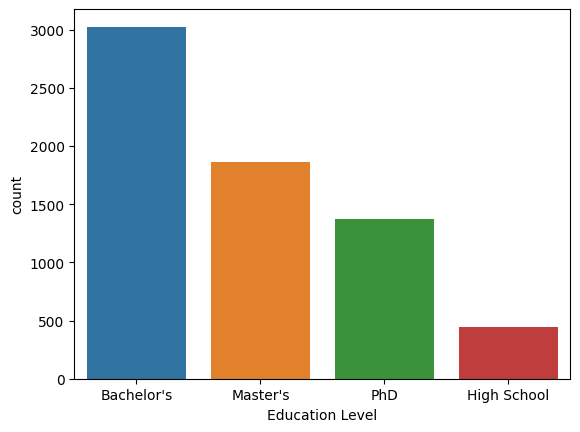

In [28]:
sns.countplot(x="Education Level", data=df)

In [29]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              2
Years of Experience    0
Salary                 5
dtype: int64

In [30]:
df["Job Title"].fillna(df["Job Title"].mode()[0], inplace = True)

/tmp/ipykernel_35/3990992822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Job Title"].fillna(df["Job Title"].mode()[0], inplace = True)


In [31]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 5
dtype: int64

In [32]:
df.dropna(subset=["Salary"], inplace = True)

In [33]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [34]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [35]:
df["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [36]:
len(df["Job Title"].unique())

192

In [37]:
df = df.drop("Job Title", axis =1)

In [38]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary'], dtype='object')

In [39]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=["object", "category"]).columns, drop_first=True)

In [40]:
df.shape

(6699, 8)

In [41]:
df

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,5.0,90000.0,True,False,False,False,False
1,28.0,3.0,65000.0,False,False,False,True,False
2,45.0,15.0,150000.0,True,False,False,False,True
3,36.0,7.0,60000.0,False,False,False,False,False
4,52.0,20.0,200000.0,True,False,False,True,False
...,...,...,...,...,...,...,...,...
6699,49.0,20.0,200000.0,False,False,False,False,True
6700,32.0,3.0,50000.0,True,False,True,False,False
6701,30.0,4.0,55000.0,False,False,False,False,False
6702,46.0,14.0,140000.0,True,False,False,True,False


In [42]:
df = df.applymap(lambda x: 1 if x is True else(0 if x is False else x))

/tmp/ipykernel_35/2905120840.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else(0 if x is False else x))


In [43]:
df

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,5.0,90000.0,1,0,0,0,0
1,28.0,3.0,65000.0,0,0,0,1,0
2,45.0,15.0,150000.0,1,0,0,0,1
3,36.0,7.0,60000.0,0,0,0,0,0
4,52.0,20.0,200000.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
6699,49.0,20.0,200000.0,0,0,0,0,1
6700,32.0,3.0,50000.0,1,0,1,0,0
6701,30.0,4.0,55000.0,0,0,0,0,0
6702,46.0,14.0,140000.0,1,0,0,1,0


In [44]:
y = df["Salary"]
x = df.drop("Salary", axis=1)

In [45]:
x.head()

,Age,Years of Experience,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,5.0,1,0,0,0,0
1,28.0,3.0,0,0,0,1,0
2,45.0,15.0,1,0,0,0,1
3,36.0,7.0,0,0,0,0,0
4,52.0,20.0,1,0,0,1,0


In [46]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
x_train.shape

(5359, 7)

In [50]:
y_train.shape

(5359,)

In [51]:
x_test.shape

(1340, 7)

In [52]:
y_test.shape

(1340,)

# Simple Linear Regression
A linear model with one independent variable (feature) predicting one dependent variable (target).

In [53]:
corr_val = df.corrwith(df["Salary"])

In [54]:
corr_val.sort_values(ascending = False)

Salary                         1.000000
Years of Experience            0.808969
Age                            0.728053
Education Level_PhD            0.483203
Education Level_Master's       0.173666
Gender_Male                    0.126514
Gender_Other                   0.009141
Education Level_High School   -0.398759
dtype: float64

Years of Experience            0.808969
it is the highest correlated feature

In [55]:
single_attribute = x_train["Years of Experience"]

In [56]:
single_attribute_test = x_test["Years of Experience"]

In [57]:
single_attribute_test.shape

(1340,)

In [58]:
single_attribute_test = single_attribute_test.values.reshape(-1,1)

In [59]:
single_attribute_test.shape

(1340, 1)

In [60]:
single_attribute_test

array([[2.],
       [8.],
       [3.],
       ...,
       [1.],
       [3.],
       [0.]])

In [61]:
single_attribute

3861     3.0
4940     6.0
135     10.0
6574     6.0
3978     1.0
        ... 
3775    10.0
5194    12.0
5229     7.0
5394     8.0
862      2.0
Name: Years of Experience, Length: 5359, dtype: float64

In [62]:
single_attribute.shape

(5359,)

In [63]:
## since it ml models works on 2D data, so we will convert it into 2D

single_attribute = single_attribute.values.reshape(-1,1) #all row with 1 column

In [64]:
single_attribute

array([[ 3.],
       [ 6.],
       [10.],
       ...,
       [ 7.],
       [ 8.],
       [ 2.]])

In [65]:
single_attribute.shape

(5359, 1)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
slr = LinearRegression()

In [68]:
slr.fit(single_attribute, y_train)

LinearRegression()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Results on Training Data

In [70]:
model_prediction_OnTraing = slr.predict(single_attribute)

In [71]:
print("MSE: ",mean_squared_error(model_prediction_OnTraing, y_train))
print("MAE: ",mean_absolute_error(model_prediction_OnTraing, y_train))
print("R2 Score: ", r2_score(model_prediction_OnTraing, y_train))

MSE:  966731516.9085451
MAE:  24944.31940705492
R2 Score:  0.4643874782585097


## Results on Testing Data

In [72]:
model_prediction_OnTest = slr.predict(single_attribute_test)

In [73]:
print("MSE: ",mean_squared_error(model_prediction_OnTest, y_test))
print("MAE: ",mean_absolute_error(model_prediction_OnTest, y_test))
print("R2 Score: ", r2_score(model_prediction_OnTest, y_test))

MSE:  946833177.7094355
MAE:  24722.101443221916
R2 Score:  0.4977299272857767


# Multiple Linear Regression
A linear model with two or more independent variables predicting one dependent variable.

In [74]:
mlr = LinearRegression()

In [75]:
mlr.fit(x_train, y_train)

LinearRegression()

## Checking results on trainig dataset

In [76]:
mlr_train_predict = mlr.predict(x_train)

In [77]:
print("MSE: ",mean_squared_error(mlr_train_predict, y_train))
print("MAE: ",mean_absolute_error(mlr_train_predict, y_train))
print("R2 Score: ", r2_score(mlr_train_predict, y_train))

MSE:  794772614.7218889
MAE:  22154.385925442268
R2 Score:  0.5979635907263277


## Checking results on testing dataset

In [78]:
mlr_test_predict = mlr.predict(x_test)

In [79]:
print("MSE: ",mean_squared_error(mlr_test_predict, y_test))
print("MAE: ",mean_absolute_error(mlr_test_predict, y_test))
print("R2 Score: ", r2_score(mlr_test_predict, y_test))

MSE:  761494354.854184
MAE:  21454.19208916121
R2 Score:  0.6375356982679632


# Polynomial Linear Regression
Polynomial Linear Regression is an extension of linear regression that models the non-linear relationship between the independent variable(s) and the target variable by introducing polynomial terms.

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
plr = PolynomialFeatures(degree=5)

x_trainP = plr.fit_transform(x_train)
x_testP = plr.fit_transform(x_test)

In [82]:
plrModel = LinearRegression()

In [83]:
plrModel.fit(x_trainP, y_train)

LinearRegression()

In [84]:
trainplr = plrModel.predict(x_trainP)
testplr = plrModel.predict(x_testP)

In [85]:
print("For Polynomial Degree = 2 ")
print("results on traing dataset")
print()
print("MSE: ",mean_squared_error(trainplr, y_train))
print("MAE: ",mean_absolute_error(trainplr, y_train))
print("R2 Score: ", r2_score(trainplr, y_train))
print()
print("results on testing dataset")
print("MSE: ",mean_squared_error(testplr, y_test))
print("MAE: ",mean_absolute_error(testplr, y_test))
print("R2 Score: ", r2_score(testplr, y_test))
print()


For Polynomial Degree = 2 
results on traing dataset

MSE:  462268376.8095984
MAE:  16256.085969543428
R2 Score:  0.7998419238217362

results on testing dataset
MSE:  566864763.7270049
MAE:  16767.86225880517
R2 Score:  0.7749154461250658



In [86]:
print("For Polynomial Degree = 3 ")
print("results on traing dataset")
print()
print("MSE: ",mean_squared_error(trainplr, y_train))
print("MAE: ",mean_absolute_error(trainplr, y_train))
print("R2 Score: ", r2_score(trainplr, y_train))
print()
print("results on testing dataset")
print("MSE: ",mean_squared_error(testplr, y_test))
print("MAE: ",mean_absolute_error(testplr, y_test))
print("R2 Score: ", r2_score(testplr, y_test))
print()


For Polynomial Degree = 3 
results on traing dataset

MSE:  462268376.8095984
MAE:  16256.085969543428
R2 Score:  0.7998419238217362

results on testing dataset
MSE:  566864763.7270049
MAE:  16767.86225880517
R2 Score:  0.7749154461250658



In [87]:
print("For Polynomial Degree = 4 ")
print("results on traing dataset")
print()
print("MSE: ",mean_squared_error(trainplr, y_train))
print("MAE: ",mean_absolute_error(trainplr, y_train))
print("R2 Score: ", r2_score(trainplr, y_train))
print()
print("results on testing dataset")
print("MSE: ",mean_squared_error(testplr, y_test))
print("MAE: ",mean_absolute_error(testplr, y_test))
print("R2 Score: ", r2_score(testplr, y_test))
print()


For Polynomial Degree = 4 
results on traing dataset

MSE:  462268376.8095984
MAE:  16256.085969543428
R2 Score:  0.7998419238217362

results on testing dataset
MSE:  566864763.7270049
MAE:  16767.86225880517
R2 Score:  0.7749154461250658



In [88]:
print("For Polynomial Degree = 5 ")
print("results on traing dataset")
print()
print("MSE: ",mean_squared_error(trainplr, y_train))
print("MAE: ",mean_absolute_error(trainplr, y_train))
print("R2 Score: ", r2_score(trainplr, y_train))
print()
print("results on testing dataset")
print("MSE: ",mean_squared_error(testplr, y_test))
print("MAE: ",mean_absolute_error(testplr, y_test))
print("R2 Score: ", r2_score(testplr, y_test))
print()


For Polynomial Degree = 5 
results on traing dataset

MSE:  462268376.8095984
MAE:  16256.085969543428
R2 Score:  0.7998419238217362

results on testing dataset
MSE:  566864763.7270049
MAE:  16767.86225880517
R2 Score:  0.7749154461250658



Now the model is not improving after the 3 degree of polynomail, but started imporoving on training dataset means that if we increase the degree after 3 the model will start overfitting.